In [58]:
#C:\Users\abdel\Desktop\Year 4 Indiv. project\dataset_of_sounds\PlantSounds\Tomato Dry



In [59]:
#wont work if both run in the same cell
# !pip3.11 install joblib==1.2.0
# !pip3.11 install scikit-learn==1.2.1

In [60]:
#!pip3.11 install pandas==1.3.5

In [61]:
#!pip3.11 install librosa

In [62]:
#!pip3.11 install matplotlib

In [63]:
#!pip3.11 install seaborn

In [64]:
import joblib
from joblib import dump
import sklearn
import pandas as pd

print(joblib.__version__)
print(sklearn.__version__)
print(pd.__version__)

1.2.0
1.2.1
1.3.5


In [65]:
import os
import scipy.io.wavfile as wavfile
import numpy as np

from scipy.signal import find_peaks
from scipy import stats
import librosa

def feature_extraction(file_path):
    # Read the wav file
    sample_rate, data = wavfile.read(file_path)
    #normalise data
    datamax = np.max(np.abs(data))
    data = data/datamax
    # total energy
    energy = np.sum(np.square(data))
    # energy entropy
    energy_entropy = stats.entropy(np.abs(data))
    # spectral entropy
    fft_result = np.fft.rfft(data)
    fft_freq = np.fft.rfftfreq(len(data), 1/sample_rate)
    spectral_entropy = stats.entropy(np.abs(fft_result))
    # max frequency
    max_peak_index = np.argmax(np.abs(fft_result))
    max_freq = fft_freq[max_peak_index]
    # MFCCs
    mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13, n_fft=512, hop_length=256)
    #mfccs = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=13, n_fft=512, hop_length=256, n_mels=40)
    # Mean of MFCCs
    mfccs_mean = np.mean(mfccs, axis=1)

    #return energy, energy_entropy, spectral_entropy, max_freq, list(mfccs_mean)
    return max_freq, list(mfccs_mean)

# List of directories containing the .wav files
directories = ['C:/Users/abdel/Desktop/Year 4 Indiv. project/dataset_of_sounds/PlantSounds/Tomato Dry',
               'C:/Users/abdel/Desktop/Year 4 Indiv. project/dataset_of_sounds/PlantSounds/Greenhouse Noises',
               'C:/Users/abdel/Desktop/Year 4 Indiv. project/dataset_of_sounds/PlantSounds/Empty Pot',
               # Add more directories as needed
              ]

# Initialize an empty DataFrame to store the results
#df = pd.DataFrame(columns=['File', 'Energy', 'Energy Entropy', 'Spectral Entropy', 'Max Frequency'] + [f'MFCC Mean {i+1}' for i in range(13)]+['Sound Type'])
df = pd.DataFrame(columns=['File', 'Max Frequency'] + [f'MFCC Mean {i+1}' for i in range(13)]+['Sound Type'])

# Loop over the directories
for directory in directories:
    # Get a list of all .wav files in the directory
    wav_files = [f for f in os.listdir(directory) if f.endswith('.wav')]
    if 'Tomato Dry' in directory:
        sound_type = 'plant'
        print("start with tomato dry")
    else:
        print("then noise")
        sound_type = 'noise'

    # Loop over the .wav files
    for wav_file in wav_files:
        # Perform FFT on the wav file
        features = feature_extraction(os.path.join(directory, wav_file))

        # # Append the results to the DataFrame
        # df = df.append({'File': wav_file,
        #                 'Energy': features[0],
        #                 'Energy Entropy': features[1],
        #                 'Spectral Entropy': features[2],
        #                 'Max Frequency': features[3],
        #                 **{f'MFCC Mean {i+1}': features[4][i] for i in range(13)},
        #                 'Sound Type': sound_type}, ignore_index=True)
        # Append the results to the DataFrame
        df = df.append({'File': wav_file,
                        'Max Frequency': features[0],
                        **{f'MFCC Mean {i+1}': features[1][i] for i in range(13)},
                        'Sound Type': sound_type}, ignore_index=True)



start with tomato dry


c:\Users\abdel\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\feature\spectral.py:2143: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


then noise
then noise


In [66]:
df

,File,Max Frequency,MFCC Mean 1,MFCC Mean 2,MFCC Mean 3,MFCC Mean 4,MFCC Mean 5,MFCC Mean 6,MFCC Mean 7,MFCC Mean 8,MFCC Mean 9,MFCC Mean 10,MFCC Mean 11,MFCC Mean 12,MFCC Mean 13,Sound Type
0,id_101_sound_1.wav,31468.531469,-625.585278,-276.184307,-5.408377,50.432370,-3.698561,-11.439797,-4.352741,0.197381,0.611799,-3.123772,-1.808826,-0.112693,3.789498,plant
1,id_101_sound_10.wav,30469.530470,-671.009106,-249.615076,0.078336,56.460329,-13.053977,-10.615313,0.436044,-2.043741,-1.093545,0.769614,-7.356476,1.293862,9.840357,plant
2,id_101_sound_11.wav,60939.060939,-646.360444,-255.032341,0.916241,52.572362,-11.744836,-10.288488,-0.381829,-1.032435,2.891710,-5.185247,-1.437533,-1.997684,3.691298,plant
3,id_101_sound_12.wav,31468.531469,-651.700520,-250.542667,6.847289,52.406092,-14.870699,-10.890427,1.603056,-1.507505,0.843325,-1.757324,-6.549845,-0.447674,11.669554,plant
4,id_101_sound_13.wav,68931.068931,-747.570835,-272.654833,15.661742,56.170797,-22.618583,-6.450157,0.676903,0.633887,-1.267186,-6.025834,-2.056243,3.616566,4.596609,plant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,id_0_sound_995.wav,51948.051948,-659.269244,-269.709018,-27.778732,46.756532,0.816569,-16.405404,-7.067004,3.980354,0.635842,-9.994839,-3.674911,3.796369,0.347728,noise
4032,id_0_sound_996.wav,37462.537463,-700.924686,-226.561830,-20.261554,48.715170,-4.706876,-13.135140,2.284838,-1.679400,-0.913450,-1.966305,-4.838219,2.546960,1.669830,noise
4033,id_0_sound_997.wav,29470.529471,-760.150680,-265.914522,-1.336144,50.618439,-11.132508,-5.198600,-4.399294,-0.625289,-0.000910,-1.378494,-7.541363,3.051381,5.465762,noise
4034,id_0_sound_998.wav,39460.539461,-746.578121,-239.643463,-18.089062,51.226562,-10.196092,-11.344987,-3.313523,4.044974,-1.382109,-8.910753,0.380328,1.357523,1.530286,noise


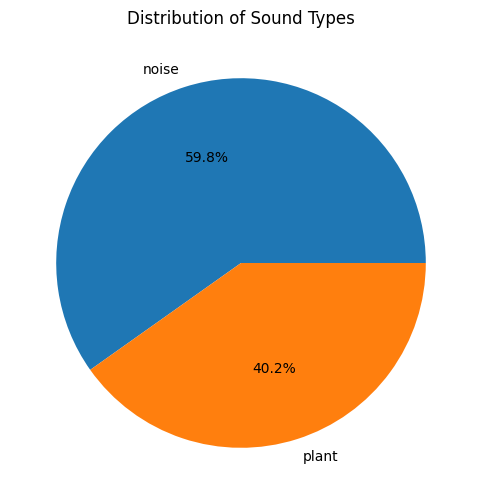

In [67]:
import matplotlib.pyplot as plt

# Count the occurrences of each unique value in the "Sound Type" column
sound_counts = df['Sound Type'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 6))
plt.pie(sound_counts, labels=sound_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Sound Types')
plt.show()

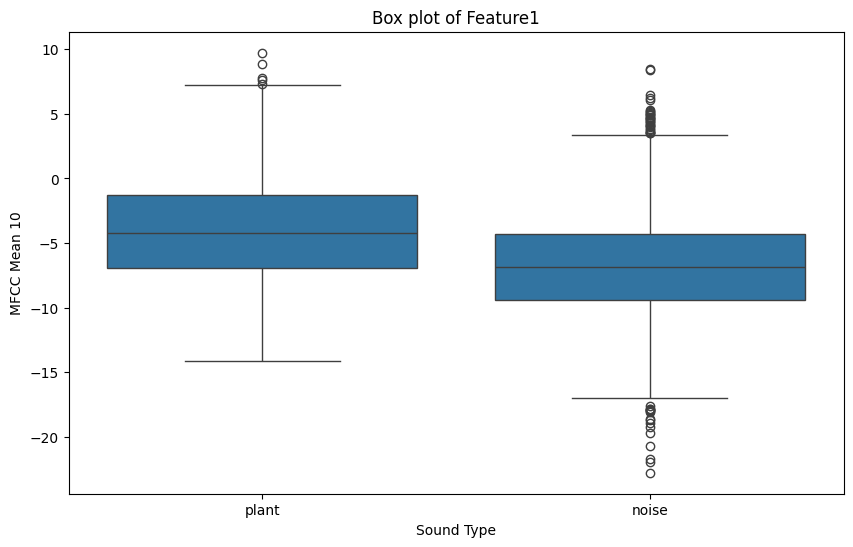

In [68]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sound Type', y='MFCC Mean 10', data=df)
plt.title('Box plot of Feature1')
plt.show()

In [69]:
df = df.drop('File', axis=1)

In [70]:
df

,Max Frequency,MFCC Mean 1,MFCC Mean 2,MFCC Mean 3,MFCC Mean 4,MFCC Mean 5,MFCC Mean 6,MFCC Mean 7,MFCC Mean 8,MFCC Mean 9,MFCC Mean 10,MFCC Mean 11,MFCC Mean 12,MFCC Mean 13,Sound Type
0,31468.531469,-625.585278,-276.184307,-5.408377,50.432370,-3.698561,-11.439797,-4.352741,0.197381,0.611799,-3.123772,-1.808826,-0.112693,3.789498,plant
1,30469.530470,-671.009106,-249.615076,0.078336,56.460329,-13.053977,-10.615313,0.436044,-2.043741,-1.093545,0.769614,-7.356476,1.293862,9.840357,plant
2,60939.060939,-646.360444,-255.032341,0.916241,52.572362,-11.744836,-10.288488,-0.381829,-1.032435,2.891710,-5.185247,-1.437533,-1.997684,3.691298,plant
3,31468.531469,-651.700520,-250.542667,6.847289,52.406092,-14.870699,-10.890427,1.603056,-1.507505,0.843325,-1.757324,-6.549845,-0.447674,11.669554,plant
4,68931.068931,-747.570835,-272.654833,15.661742,56.170797,-22.618583,-6.450157,0.676903,0.633887,-1.267186,-6.025834,-2.056243,3.616566,4.596609,plant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,51948.051948,-659.269244,-269.709018,-27.778732,46.756532,0.816569,-16.405404,-7.067004,3.980354,0.635842,-9.994839,-3.674911,3.796369,0.347728,noise
4032,37462.537463,-700.924686,-226.561830,-20.261554,48.715170,-4.706876,-13.135140,2.284838,-1.679400,-0.913450,-1.966305,-4.838219,2.546960,1.669830,noise
4033,29470.529471,-760.150680,-265.914522,-1.336144,50.618439,-11.132508,-5.198600,-4.399294,-0.625289,-0.000910,-1.378494,-7.541363,3.051381,5.465762,noise
4034,39460.539461,-746.578121,-239.643463,-18.089062,51.226562,-10.196092,-11.344987,-3.313523,4.044974,-1.382109,-8.910753,0.380328,1.357523,1.530286,noise


In [71]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
df_std = df.drop(columns=['Sound Type'])
df_std = scaler.fit_transform(df_std) # will remove featue name row
df_std = pd.DataFrame(df_std, columns=df.columns[:-1]) # put back feature name row
df_std['Sound Type'] = df['Sound Type'] # put back LABEL row
df_std.describe()

,Max Frequency,MFCC Mean 1,MFCC Mean 2,MFCC Mean 3,MFCC Mean 4,MFCC Mean 5,MFCC Mean 6,MFCC Mean 7,MFCC Mean 8,MFCC Mean 9,MFCC Mean 10,MFCC Mean 11,MFCC Mean 12,MFCC Mean 13
count,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03,4.036000e+03
mean,-1.056307e-16,3.521024e-16,1.267569e-16,-1.408410e-16,2.183035e-16,8.450459e-17,-5.633639e-17,5.633639e-17,1.408410e-17,-4.225229e-17,1.126728e-16,4.929434e-17,-1.056307e-17,-7.042049e-18
std,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00,1.000124e+00
min,-1.998145e+00,-2.161776e+00,-3.409033e+00,-2.348263e+00,-2.820195e+00,-2.455696e+00,-4.466483e+00,-4.481500e+00,-4.935822e+00,-3.298526e+00,-3.994147e+00,-4.070142e+00,-3.981577e+00,-3.973464e+00
25%,-6.718980e-01,-8.021542e-01,-6.952972e-01,-9.514790e-01,-6.560312e-01,-7.077261e-01,-5.328059e-01,-6.268889e-01,-6.284646e-01,-6.599648e-01,-6.763528e-01,-6.250832e-01,-6.620287e-01,-6.594083e-01
50%,-1.832805e-01,-2.193856e-01,-2.214176e-02,3.213099e-01,-2.672311e-01,-1.687508e-01,1.690993e-01,-4.721631e-02,6.868897e-02,-1.027402e-01,-4.066635e-02,3.587336e-02,-1.544591e-04,2.816120e-02
75%,5.612794e-01,8.792290e-01,6.490851e-01,8.265555e-01,4.509461e-01,6.268059e-01,6.700136e-01,6.390763e-01,6.406121e-01,5.721936e-01,6.332937e-01,6.633923e-01,6.451478e-01,6.748191e-01
max,8.286089e+00,3.897651e+00,3.853831e+00,1.523066e+00,3.358244e+00,3.755649e+00,3.178115e+00,3.953603e+00,5.938705e+00,4.004863e+00,3.605917e+00,3.635614e+00,4.196442e+00,3.522424e+00


In [81]:
df_std

,Max Frequency,MFCC Mean 1,MFCC Mean 2,MFCC Mean 3,MFCC Mean 4,MFCC Mean 5,MFCC Mean 6,MFCC Mean 7,MFCC Mean 8,MFCC Mean 9,MFCC Mean 10,MFCC Mean 11,MFCC Mean 12,MFCC Mean 13,Sound Type
0,-0.648631,0.212920,-0.826288,0.653291,-0.563614,-0.169355,0.320206,0.105449,0.152097,-0.439965,0.601333,0.468432,-0.584214,0.616290,plant
1,-0.695166,-0.399359,0.263349,0.781197,-0.188148,-0.784557,0.409343,0.794367,-0.300941,-0.773908,1.511323,-0.809570,-0.216248,2.268825,plant
2,0.724152,-0.067113,0.041180,0.800731,-0.430320,-0.698469,0.444676,0.676707,-0.096508,0.006491,0.119511,0.553966,-1.077342,0.589471,plant
3,-0.648631,-0.139093,0.225307,0.938995,-0.440676,-0.904022,0.379600,0.962254,-0.192542,-0.394627,0.920709,-0.623748,-0.671847,2.768393,plant
4,1.096432,-1.431353,-0.681540,1.144478,-0.206182,-1.413514,0.859646,0.829017,0.240335,-0.807911,-0.076957,0.411435,0.391389,0.836718,plant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4031,0.305337,-0.241114,-0.560729,0.131792,-0.792573,0.127554,-0.216635,-0.285027,0.916816,-0.435257,-1.004620,0.038545,0.438427,-0.323683,noise
4032,-0.369421,-0.802598,1.208791,0.307033,-0.670574,-0.235661,0.136920,1.060335,-0.227291,-0.738642,0.871865,-0.229444,0.111572,0.037393,noise
4033,-0.741701,-1.600920,-0.405112,0.748223,-0.552025,-0.658203,0.994954,0.098752,-0.014204,-0.559947,1.009252,-0.852162,0.243533,1.074091,noise
4034,-0.276351,-1.417972,0.672297,0.357678,-0.514146,-0.596626,0.330456,0.254951,0.929879,-0.830416,-0.751240,0.972743,-0.199594,-0.000717,noise


In [72]:
from sklearn.model_selection import train_test_split

x=df_std.iloc[:,:14]
y=df_std['Sound Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [73]:
# ##SVM

# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import GridSearchCV

# # WARNING: BEST COEFFICIENTS CALCULATION FOR SVC TAKES LONG
# ## Grid calculation for SVC "poly" kernel
# # Define the model
# svc = SVC(kernel="poly", max_iter=100000)

# # Define the parameter range for 'C', 'degree' and 'coef0'
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100],
#     'degree': [2, 3, 4, 5],
#     'coef0': [0.0, 0.1, 0.5, 1.0]
# }

# # Run grid search
# grid_search = GridSearchCV(svc, param_grid, cv=5)
# grid_search.fit(x_train, y_train)
# # Print the optimal 'C' value
# best_params_poly = grid_search.best_params_
# print("Best parameters: ", best_params_poly)
##Best parameters:  {'C': 1, 'coef0': 1.0, 'degree': 3}

pipeline method

In [74]:
# #Best parameters:  {'C': 1, 'coef0': 1.0, 'degree': 3}
# from sklearn.metrics import ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# from sklearn.metrics import f1_score
# from sklearn.pipeline import make_pipeline
# from sklearn.svm import SVC

# svc_poly = SVC(kernel="poly", max_iter=100000,
#                         C=1, 
#                         degree=3,
#                         coef0=1.0, probability=True)

# pipeline = make_pipeline(scaler, svc_poly)

# pipeline.fit(x_train, y_train)

In [75]:
# # Calculate the accuracy of the model on the test data
# accuracy_svc_poly = pipeline.score(x_test, y_test)
# print(f"Validation accuracy: {accuracy_svc_poly}")

# y_pred = pipeline.predict(x_test)


# f1 = f1_score(y_test, y_pred, average='weighted')
# print('F1 Score:', f1)

# # Assuming y_pred are your model predictions and y_test are your true labels
# ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.show()

In [76]:
# #Save the model to disk
# #dump(svc_poly, 'svc_polyv2.joblib')
# # Save the pipeline
# joblib.dump(pipeline, 'svc_polyv4.pkl')

In [77]:
print(librosa.__version__)

0.10.1


not pipeline method

In [78]:
#Best parameters:  {'C': 1, 'coef0': 1.0, 'degree': 3}
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

svc_poly = SVC(kernel="poly", max_iter=100000,
                        C=1, 
                        degree=3,
                        coef0=1.0, probability=True)

svc_poly.fit(x_train, y_train)

SVC(C=1, coef0=1.0, kernel='poly', max_iter=100000, probability=True)

Validation accuracy: 0.9900990099009901
F1 Score: 0.990107815129339


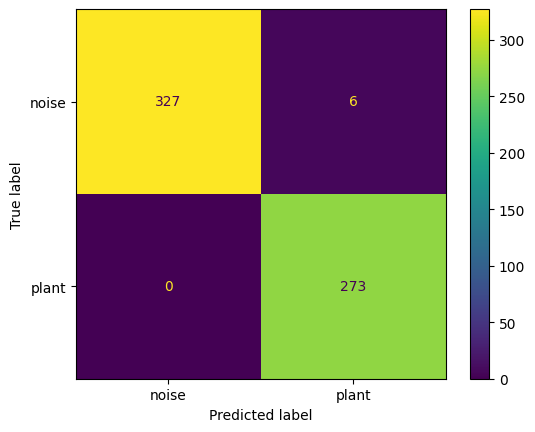

In [79]:
# Calculate the accuracy of the model on the test data
accuracy_svc_poly = svc_poly.score(x_test, y_test)
print(f"Validation accuracy: {accuracy_svc_poly}")

y_pred = svc_poly.predict(x_test)


f1 = f1_score(y_test, y_pred, average='weighted')
print('F1 Score:', f1)

# Assuming y_pred are your model predictions and y_test are your true labels
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [80]:
#Save the model to disk
import joblib

# Save the scaler
joblib.dump(scaler, 'test_scaler.pkl')

# Save the model
joblib.dump(svc_poly, 'test_model.pkl')

['test_model.pkl']

In [82]:
# Access the mean of each feature
mean = scaler.mean_

# Access the variance of each feature
var = scaler.var_

print("Mean:", mean)
print("Variance:", var)

Mean: [ 4.53931599e+04 -6.41381439e+02 -2.56036460e+02 -3.34321426e+01
  5.94809669e+01 -1.12316121e+00 -1.44016021e+01 -5.08573374e+00
 -5.55022205e-01  2.85856294e+00 -5.69657508e+00 -3.84223164e+00
  2.12047341e+00  1.53291322e+00]
Variance: [4.60863679e+08 5.50387628e+03 5.94557625e+02 1.84009273e+03
 2.57749855e+02 2.31255237e+02 8.55565551e+01 4.83187723e+01
 2.44715746e+01 2.60782477e+01 1.83055311e+01 1.88432285e+01
 1.46116398e+01 1.34070310e+01]
